In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Train Data exploration and visualization

In [2]:
df_train = pd.read_csv('train.csv')
df_train.shape

(404290, 6)

In [3]:

df_train = df_train.loc[np.random.random_integers(0, len(df_train), 10000)]
len(df_train)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 404290 + 1) instead
  


10000

In [4]:
qids = pd.Series(df_train['qid1'].tolist()+df_train['qid2'].tolist())

In [5]:
qids.value_counts() # Question Number of times repeated

27517     5
2559      4
26757     4
32200     4
19621     4
108804    3
25984     3
14110     3
50805     3
10330     3
99661     3
36911     3
12639     3
1357      3
117292    3
86296     3
130137    3
79403     3
25163     3
11477     3
57054     3
4352      3
205085    3
24272     3
30030     3
71508     3
266963    3
33475     3
4351      3
24779     3
         ..
363611    1
404575    1
482401    1
25702     1
390228    1
185687    1
265323    1
30183     1
447600    1
493407    1
52339     1
386134    1
445523    1
113709    1
285761    1
89137     1
453687    1
463928    1
212157    1
113725    1
518135    1
83010     1
384081    1
18497     1
496712    1
13388     1
468046    1
11343     1
21584     1
32768     1
Length: 19227, dtype: int64

In [6]:
unique_qid = set(qids)
unique_qsts = len(unique_qid)
qs_morethan_onetime= sum(qids.value_counts()>1)
qs_morethan_onetime

706

In [7]:
  df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
83485,83485,141325,141326,Why don't people trust me?,I don't trust my boyfriend because he lies to ...,0
339456,339456,27935,467118,How many hours before the departure of a train...,When is the chart preparation time for train n...,0
4639,4639,9163,9164,What are some of the best coaching institutes ...,What are best and reliable institutes for gmat...,1
108477,108477,178226,46708,How would I dress in a workout gear like it's ...,How would I dress like a workout guy from the ...,1
188960,188960,75532,287610,Why don't more people upvote the answers on Qu...,Why do people upvote anything on Quora?,0


In [8]:
#check how many questions with any null value
nan_count = df_train[df_train.isnull().any(1)]
nan_count

,id,qid1,qid2,question1,question2,is_duplicate


In [9]:
df_train[df_train.isnull().any(1)]
df_train = df_train.fillna('') #Fill null values with '' string

In [10]:
#Re-check how many questions with any null value
nan_count = df_train[df_train.isnull().any(1)]
nan_count #Finally the we found the question with no null values 

,id,qid1,qid2,question1,question2,is_duplicate


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 83485 to 218273
Data columns (total 6 columns):
id              10000 non-null int64
qid1            10000 non-null int64
qid2            10000 non-null int64
question1       10000 non-null object
question2       10000 non-null object
is_duplicate    10000 non-null int64
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


In [12]:
df_train.groupby("is_duplicate")['id'].count() #count the number of 'duplicate' and 'non-duplicate' question

is_duplicate
0    6330
1    3670
Name: id, dtype: int64

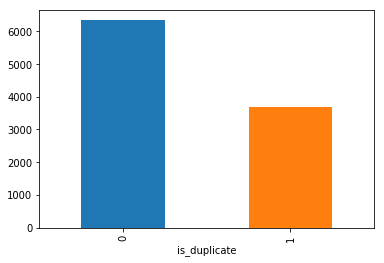

In [13]:
df_train.groupby("is_duplicate")['id'].count().plot.bar() #plot the graph for the above data

In [14]:
is_duplicate0 = len(df_train[df_train['is_duplicate']==0])
is_duplicate0/len(df_train)
print("Percentage of non-Duplicate Questions: %d percentage"%((is_duplicate0/len(df_train))*100))

Percentage of non-Duplicate Questions: 63 percentage


In [15]:
is_duplicate1 = len(df_train[df_train['is_duplicate']==1])
is_duplicate1/len(df_train)

print("Percentage of Duplicate Questions: %d percentage"%((is_duplicate1/len(df_train))*100))

Percentage of Duplicate Questions: 36 percentage


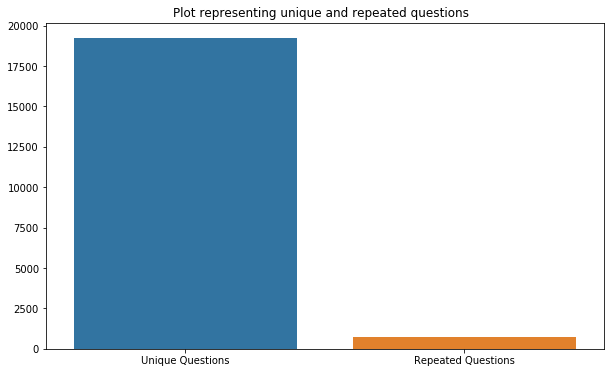

In [16]:
x = ["Unique Questions" , "Repeated Questions"]
y =  [unique_qsts , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [17]:
#Check whether there are any repeated pair of questions
pair_duplicates  = df_train[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print('Total Number of pair_duplicates groups: ',pair_duplicates.shape[0])
print('Total Number of row: ',df_train.shape[0]) #If both count are equal then there are no duplicates
print("Total duplicate pairs: ",(df_train.shape[0] - pair_duplicates.shape[0]))

Total Number of pair_duplicates groups:  9893
Total Number of row:  10000
Total duplicate pairs:  107


### Overall info about train Data

In [18]:
df_test = pd.read_csv('test.csv')

In [19]:
print('Total number of question pairs in training dataset: ', len(df_train))
print('total number of question pairs to predict is_duplicate: ', len(df_test))
print('Total number of unique questions in training dataset: ', len(unique_qid))
print("In Train dataset: ")
print('Total percentage of is_duplicate=0: ', round((is_duplicate0/(is_duplicate0+is_duplicate1))*100, 2), "%")
print('Total percentage of is_duplicate=1: ', round((is_duplicate1/(is_duplicate0+is_duplicate1))*100, 2), "%")

Total number of question pairs in training dataset:  10000
total number of question pairs to predict is_duplicate:  2345796
Total number of unique questions in training dataset:  19227
In Train dataset: 
Total percentage of is_duplicate=0:  63.3 %
Total percentage of is_duplicate=1:  36.7 %


###  Feature extraction 

1. **q1_len** = Length of Question-1
2. **q2_len** = Length of Question-2
3. **q1_no_words** = Number of words in Question-1
4. **q2_no_words** = Number of words in Question-2
5. **total_uni_words** = Total number of unique words in Question-1 and Question-2, Combine and find unique.
6. **common_words** = Total number of common words in both Question-1 and Question-2
7. **word_share** = Total number of words share(common_words/total_words)
8. **total_words** = Total number of words unique words in Question-1 and Question-2, find Unique in each and add them.

In [20]:
# def total_uni_words(row):
# #     print(row['question1'])
# df_train['total_uni_words'] = df_train.apply(total_uni_words, axis=1)

In [21]:
df_train['q1_len'] = df_train['question1'].str.len()
df_train['q2_len'] = df_train['question2'].str.len()
df_train['q1_no_words'] = df_train['question1'].apply(lambda x: len(x.split()))
df_train['q2_no_words'] = df_train['question2'].apply(lambda x: len(x.split()))
def total_uni_words(row):
    q1_w = row['question1'].lower().strip().split()
    q2_w = row['question2'].lower().strip().split()
    total_w = len(set(q1_w + q2_w))
    return total_w
df_train['total_uni_words'] = df_train.apply(total_uni_words, axis=1)
def total_words(row):
    q1_w = set(row['question1'].lower().strip().split())
    q2_w = set(row['question2'].lower().strip().split())
    total_w = len(q1_w)+ len(q2_w)
    return total_w

df_train['total_words'] = df_train.apply(total_words, axis=1)

def common_words(row):
    q1_w = set(row['question1'].lower().strip().split())
    q2_w = set(row['question2'].lower().strip().split())
    common_w = len(q1_w.intersection(q2_w)) #find common between two sets
#     x = set(["a","b","c","d"])
#     y = set(["c","d", 'f'])
#     print( y.intersection(x) )
#     outPut: {'c', 'd'}
    return common_w
df_train['common_words'] = df_train.apply(common_words, axis=1)   
def word_share(row):
    w_share = row['common_words']/row['total_words']
    return 1.0*w_share
    
df_train['word_share'] = df_train.apply(word_share, axis=1)   
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share
83485,83485,141325,141326,Why don't people trust me?,I don't trust my boyfriend because he lies to ...,0,26,67,5,14,16,18,2,0.111111
339456,339456,27935,467118,How many hours before the departure of a train...,When is the chart preparation time for train n...,0,69,58,13,10,19,23,4,0.173913
4639,4639,9163,9164,What are some of the best coaching institutes ...,What are best and reliable institutes for gmat...,1,68,60,12,10,15,22,7,0.318182
108477,108477,178226,46708,How would I dress in a workout gear like it's ...,How would I dress like a workout guy from the ...,1,73,56,17,12,19,28,9,0.321429
188960,188960,75532,287610,Why don't more people upvote the answers on Qu...,Why do people upvote anything on Quora?,0,50,39,9,7,11,16,5,0.312500


\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


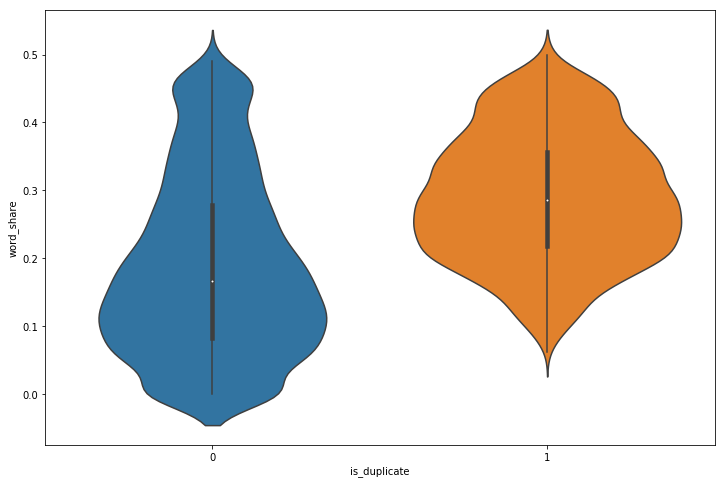

In [22]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


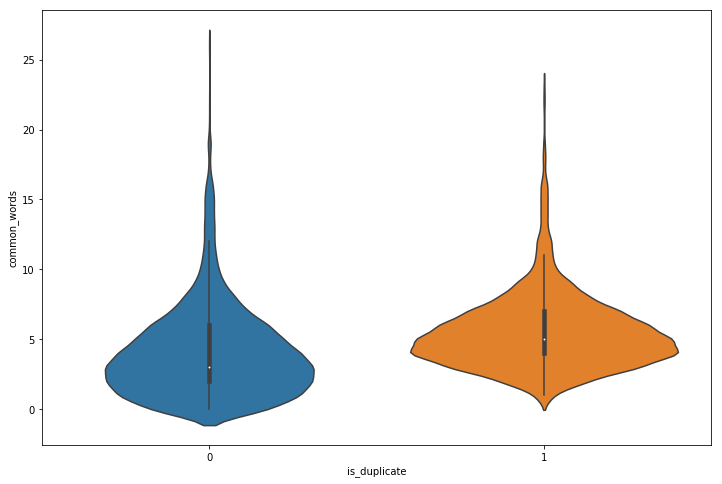

In [23]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'common_words', data = df_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


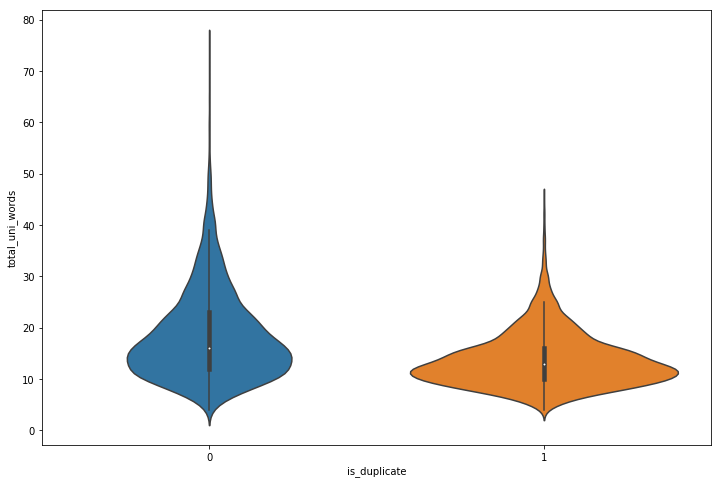

In [24]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'total_uni_words', data = df_train)

In [25]:
#Some Analysis of extracted feature

print("Shortest length of the question in Question-1: %d"%min(df_train['q1_no_words']))
print("Shortest length of the question in Question-2:  %d"%min(df_train['q2_no_words']))

Shortest length of the question in Question-1: 1
Shortest length of the question in Question-2:  2


In [26]:
df_train = df_train[df_train['q1_no_words']>0]
df_train = df_train[df_train['q2_no_words']>0]
print("Shortest length of the question in Question-1: %d"%min(df_train['q1_no_words']))
print("Shortest length of the question in Question-2:  %d"%min(df_train['q2_no_words']))

Shortest length of the question in Question-1: 1
Shortest length of the question in Question-2:  2


In [27]:
# Now find how many number of questions with min length
print("Total number of question with min length in Question-1: ",df_train[df_train['q1_no_words']==1].shape[0])
print("Total number of question with min length in Question-2: ",df_train[df_train['q2_no_words']==1].shape[0])

Total number of question with min length in Question-1:  3
Total number of question with min length in Question-2:  0


### PreProcessing the text

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
stop_words = stopwords.words("english")

In [29]:

def preProcess(x):
    x = str(x).lower()
    x = x.replace("won't", "will not")\
            .replace("cannot", "can not")\
            .replace("can't", "can not")\
            .replace("n't", " not")\
            .replace("what's", "what is")\
            .replace("it's", "it is")\
            .replace("i'm", "i am")\
            .replace("'re", " are")\
            .replace("%", " percent ")\
            .replace("€", " euro ")\
            .replace("'ll", " will")\
            .replace(",000,000", "m")\
            .replace(",000", "k")
#     x = re.sub(r"([0-9]+)000000", r"\1m", x)
#     x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
        temp = BeautifulSoup(x)
        x = temp.get_text()
#     print(x)
    return x

In [30]:
df_train['question1'] = df_train["question1"].fillna("").apply(preProcess)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [31]:
df_train['question1'].head()

83485                           why do not people trust me?
339456    how many hours before the departure of a train...
4639      what are some of the best coaching institutes ...
108477    how would i dress in a workout gear like it is...
188960    why do not more people upvote the answers on q...
Name: question1, dtype: object

In [32]:
df_train['question2'] = df_train["question2"].fillna("").apply(preProcess)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [33]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share
83485,83485,141325,141326,why do not people trust me?,i do not trust my boyfriend because he lies to...,0,26,67,5,14,16,18,2,0.111111
339456,339456,27935,467118,how many hours before the departure of a train...,when is the chart preparation time for train n...,0,69,58,13,10,19,23,4,0.173913
4639,4639,9163,9164,what are some of the best coaching institutes ...,what are best and reliable institutes for gmat...,1,68,60,12,10,15,22,7,0.318182
108477,108477,178226,46708,how would i dress in a workout gear like it is...,how would i dress like a workout guy from the ...,1,73,56,17,12,19,28,9,0.321429
188960,188960,75532,287610,why do not more people upvote the answers on q...,why do people upvote anything on quora?,0,50,39,9,7,11,16,5,0.312500


### Feature Extraction from fuzzywuzzy

In [34]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [35]:
'''
Definations

1. Simple Ratio: Compare two sequences and produce the ratio of those two
2. Partial Ratio: Find the max
3. Token Sort Ratio: The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. 
4. Token Set Ratio: we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.
'''


'\nDefinations\n\n1. Simple Ratio: Compare two sequences and produce the ratio of those two\n2. Partial Ratio: Find the max\n3. Token Sort Ratio: The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. \n4. Token Set Ratio: we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.\n'

In [36]:
def fuzzy_features(row):
    simple_ratio = fuzz.ratio(row['question1'],row['question2'])
    partial_ratio =  fuzz.partial_ratio(row['question1'],row['question2'])
    token_sort_ratio = fuzz.token_sort_ratio(row['question1'],row['question2'])
    token_set_ratio =  fuzz.token_set_ratio(row['question1'],row['question2'])
    
    return [simple_ratio, partial_ratio, token_sort_ratio, token_set_ratio]

In [37]:
def fuzzy_simple_ratio(row):
    temp_ratio = fuzz.ratio(row['question1'],row['question2'])
    return temp_ratio

In [38]:
def fuzzy_partial_ratio(row):
    temp_ratio = fuzz.partial_ratio(row['question1'],row['question2'])
    return temp_ratio

In [39]:
def fuzzy_token_sort_ratio(row):
    temp_ratio = fuzz.token_sort_ratio(row['question1'],row['question2'])
    return temp_ratio

In [40]:
def fuzzy_token_set_ratio(row):
    temp_ratio = fuzz.token_set_ratio(row['question1'],row['question2'])
    return temp_ratio

In [41]:
# df_train['simple_ratio'] = df_train.apply(fuzzy_simple_ratio, axis=1)

In [42]:
# df_train['partial_ratio'] = df_train.apply(fuzzy_partial_ratio, axis=1)

In [43]:
# df_train['token_sort_ratio'] = df_train.apply(fuzzy_token_sort_ratio, axis=1)

In [44]:
# df_train['token_set_ratio'] = df_train.apply(fuzzy_token_set_ratio, axis=1)

In [45]:
fuzzy_features = df_train.apply(fuzzy_features, axis=1)

In [46]:
# fuzzy_features.values
temp = np.vstack(fuzzy_features.values)
df_train['simple_ratio'] = temp[:,0]
df_train['partial_ratio'] = temp[:,1]
df_train['token_sort_ratio'] = temp[:,2]
df_train['token_set_ratio'] = temp[:,3]
df_train['partial_token_set_ratio'] = df_train.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
df_train['partial_token_sort_ratio'] = df_train.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

In [47]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share,simple_ratio,partial_ratio,token_sort_ratio,token_set_ratio,partial_token_set_ratio,partial_token_sort_ratio
83485,83485,141325,141326,why do not people trust me?,i do not trust my boyfriend because he lies to...,0,26,67,5,14,16,18,2,0.111111,36,59,46,73,100,65
339456,339456,27935,467118,how many hours before the departure of a train...,when is the chart preparation time for train n...,0,69,58,13,10,19,23,4,0.173913,38,50,48,53,100,53
4639,4639,9163,9164,what are some of the best coaching institutes ...,what are best and reliable institutes for gmat...,1,68,60,12,10,15,22,7,0.318182,77,77,78,88,100,75
108477,108477,178226,46708,how would i dress in a workout gear like it is...,how would i dress like a workout guy from the ...,1,73,56,17,12,19,28,9,0.321429,72,75,81,95,100,73
188960,188960,75532,287610,why do not more people upvote the answers on q...,why do people upvote anything on quora?,0,50,39,9,7,11,16,5,0.312500,76,72,73,87,100,76


### Analyzing the extracted features

In [48]:
df_duplicate = df_train[df_train['is_duplicate'] == 1]
df_non_duplicate = df_train[df_train['is_duplicate'] == 0]

In [49]:
duplicate_array = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
non_duplicate_array = np.dstack([df_non_duplicate["question1"], df_non_duplicate["question2"]]).flatten()

In [50]:
text_dulicate = " ".join(duplicate_array)
text_non_dulicate = " ".join(non_duplicate_array)

In [51]:
from wordcloud import WordCloud

Word Cloud for Duplicate Question pairs


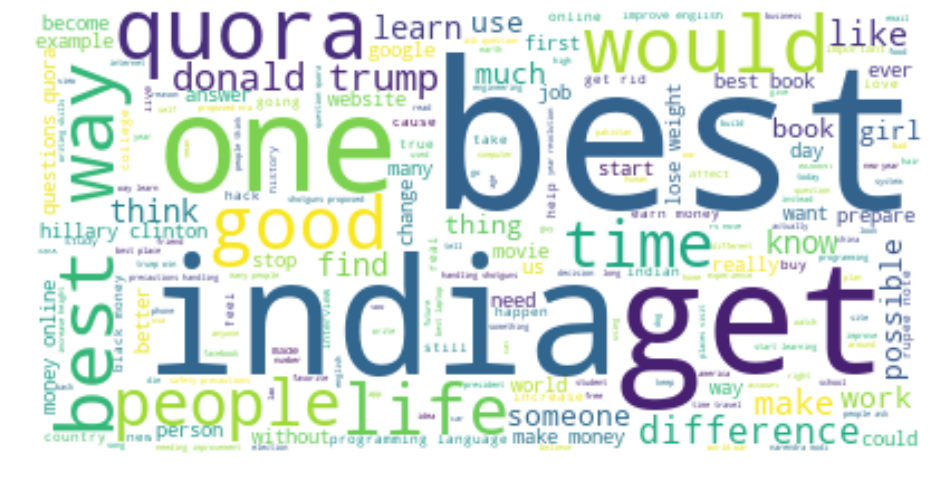

In [52]:
wc = WordCloud(background_color="white", max_words=len(text_dulicate), stopwords=stop_words)
wc.generate(text_dulicate)
print ("Word Cloud for Duplicate Question pairs")
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non Duplicate Question pairs


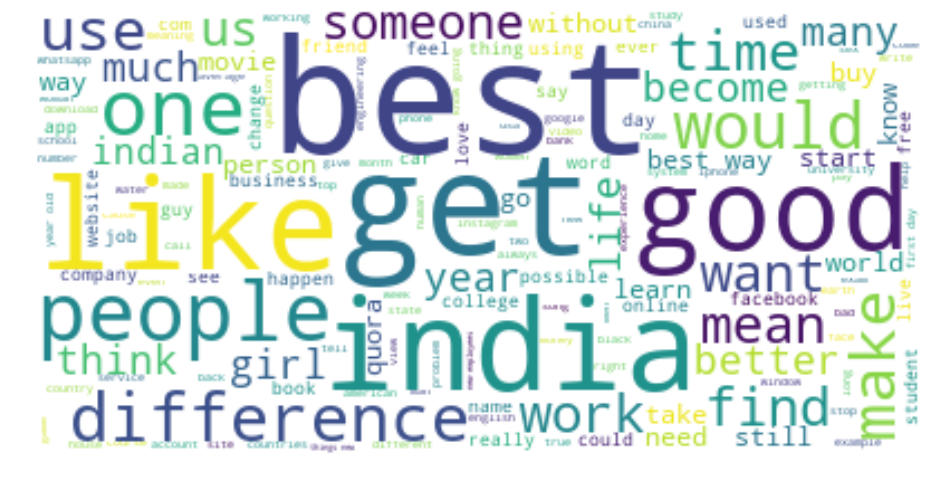

In [53]:
wc = WordCloud(background_color="white", max_words=len(text_non_dulicate), stopwords=stop_words)
wc.generate(text_non_dulicate)
print ("Word Cloud for non Duplicate Question pairs")
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
X = MinMaxScaler().fit_transform(df_train[['q1_len', 'q2_len', 'q1_no_words', 'q2_no_words', 'total_uni_words', 'total_words', 'common_words', 'word_share', 'simple_ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio','partial_token_set_ratio','partial_token_sort_ratio']])
y = df_train['is_duplicate'].values

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [55]:
X

array([[0.07894737, 0.19453925, 0.06896552, ..., 0.7244898 , 1.        ,
        0.63917526],
       [0.22039474, 0.16382253, 0.20689655, ..., 0.52040816, 1.        ,
        0.51546392],
       [0.21710526, 0.17064846, 0.18965517, ..., 0.87755102, 1.        ,
        0.74226804],
       ...,
       [0.18421053, 0.27645051, 0.17241379, ..., 0.78571429, 1.        ,
        0.71134021],
       [0.22697368, 0.16382253, 0.18965517, ..., 0.52040816, 1.        ,
        0.45360825],
       [0.77631579, 0.26962457, 0.75862069, ..., 0.40816327, 1.        ,
        0.36082474]])

In [56]:
# tsne2d = TSNE(
#     n_components=2,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [57]:
# type(tsne2d)

In [58]:
# df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# # draw the plot in appropriate place in the grid
# sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
# plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
# plt.show()

In [59]:
# from sklearn.manifold import TSNE
# tsne3d = TSNE(
#     n_components=3,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [60]:
# import plotly.graph_objs as go
# import plotly.offline as py
# trace1 = go.Scatter3d(
#     x=tsne3d[:,0],
#     y=tsne3d[:,1],
#     z=tsne3d[:,2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color = y,
#         colorscale = 'Portland',
#         colorbar = dict(title = 'duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='3d embedding with engineered features')
# fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')

In [61]:

# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
# ['id', 'qid1', 'qid2', 'question1', 'question2']
cols = list(df_train.columns)
for i in cols:
    if i not in ['id', 'qid1', 'qid2', 'question1', 'question2']:
        df_train[i] = df_train[i].apply(pd.to_numeric)
        print(i)

is_duplicate
q1_len
q2_len
q1_no_words
q2_no_words
total_uni_words
total_words
common_words
word_share
simple_ratio
partial_ratio
token_sort_ratio
token_set_ratio
partial_token_set_ratio
partial_token_sort_ratio


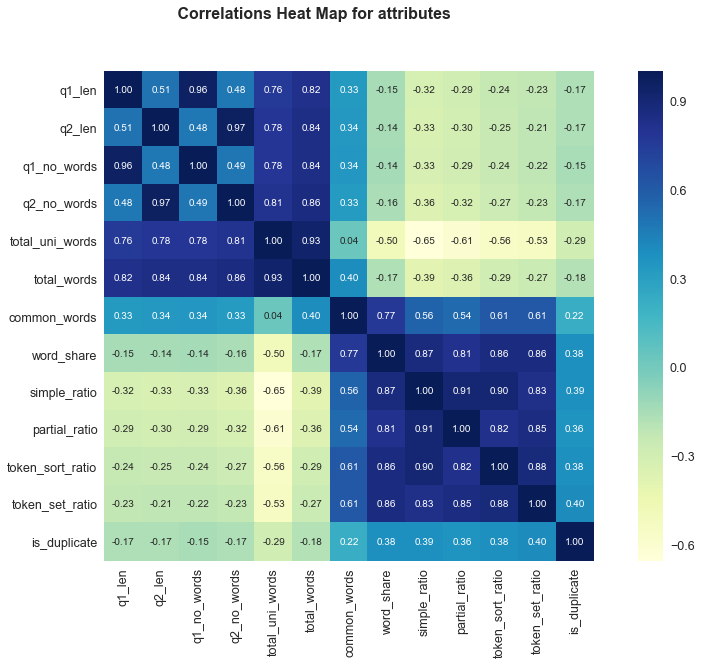

In [62]:
import seaborn as sns
cor = df_train[['q1_len', 'q2_len', 'q1_no_words', 'q2_no_words', 'total_uni_words', 'total_words', 'common_words', 'word_share', 'simple_ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']].corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(16,9))
hm = sns.heatmap(cor, cbar=True, annot=True, square=True,cmap="YlGnBu",
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')
plt.show()


# # ref: https://www.kaggle.com/fg1983/data-exploration-and-price-prediction-house-sales

In [63]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share,simple_ratio,partial_ratio,token_sort_ratio,token_set_ratio,partial_token_set_ratio,partial_token_sort_ratio
83485,83485,141325,141326,why do not people trust me?,i do not trust my boyfriend because he lies to...,0,26,67,5,14,16,18,2,0.111111,36,59,46,73,100,65
339456,339456,27935,467118,how many hours before the departure of a train...,when is the chart preparation time for train n...,0,69,58,13,10,19,23,4,0.173913,38,50,48,53,100,53
4639,4639,9163,9164,what are some of the best coaching institutes ...,what are best and reliable institutes for gmat...,1,68,60,12,10,15,22,7,0.318182,77,77,78,88,100,75
108477,108477,178226,46708,how would i dress in a workout gear like it is...,how would i dress like a workout guy from the ...,1,73,56,17,12,19,28,9,0.321429,72,75,81,95,100,73
188960,188960,75532,287610,why do not more people upvote the answers on q...,why do people upvote anything on quora?,0,50,39,9,7,11,16,5,0.312500,76,72,73,87,100,76


### Random train test split

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score
# define tfidf vectorizer 
tfidf = TfidfVectorizer(analyzer = 'word',token_pattern=r'\w{1,}',
                        ngram_range=(1,2),use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english',
                        lowercase = True,
                        max_features = None,
                        norm = 'l1')

In [65]:
# text_dulicate
s1 = pd.Series(df_train['question1'].tolist())
s2 = pd.Series(df_train['question2'].tolist())
BagOfWords = pd.concat([s1, s2])

In [66]:
tfidf.fit(BagOfWords)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l1', preprocessor=None, smooth_idf=1,
        stop_words='english', strip_accents=None, sublinear_tf=1,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=1,
        vocabulary=None)

In [67]:
train_q1_tfidf = tfidf.transform(df_train['question1'])
train_q2_tfidf = tfidf.transform(df_train['question2'])

In [68]:
# X = abs(train_q1_tfidf - train_q2_tfidf)
X= df_train[[\
       'q1_len', 'q2_len', 'q1_no_words', 'q2_no_words', 'total_uni_words',\
       'total_words', 'common_words', 'word_share']]
y = df_train['is_duplicate']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
pred_lr = lr.predict_proba(X_test)[:,1]
logloss_lr = log_loss(y_test, pred_lr)
print("Accuracy:", lr.score(X_test, y_test))
# print("Log Loss : ", logloss_lr)


Accuracy: 0.6545


In [72]:
from sklearn.metrics import confusion_matrix
# X = df.loc[:, df.columns != 'is_duplicate']
# y = df.loc[:, df.columns == 'is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

import xgboost as xgb

model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)\
        .fit(X_train, y_train.values.ravel()) 
prediction = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, prediction))

Accuracy 0.681


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share,simple_ratio,partial_ratio,token_sort_ratio,token_set_ratio,partial_token_set_ratio,partial_token_sort_ratio
83485,83485,141325,141326,why do not people trust me?,i do not trust my boyfriend because he lies to...,0,26,67,5,14,16,18,2,0.111111,36,59,46,73,100,65
339456,339456,27935,467118,how many hours before the departure of a train...,when is the chart preparation time for train n...,0,69,58,13,10,19,23,4,0.173913,38,50,48,53,100,53
4639,4639,9163,9164,what are some of the best coaching institutes ...,what are best and reliable institutes for gmat...,1,68,60,12,10,15,22,7,0.318182,77,77,78,88,100,75
108477,108477,178226,46708,how would i dress in a workout gear like it is...,how would i dress like a workout guy from the ...,1,73,56,17,12,19,28,9,0.321429,72,75,81,95,100,73
188960,188960,75532,287610,why do not more people upvote the answers on q...,why do people upvote anything on quora?,0,50,39,9,7,11,16,5,0.312500,76,72,73,87,100,76
107,107,215,216,what is the difference between love and pity?,what is the difference between love and pity?,1,44,45,7,8,9,15,6,0.400000,100,100,100,100,100,100
241008,241008,19897,141154,does milk flush the meth out of your system?,how do i get meth out of my system faster?,1,44,42,9,10,16,19,3,0.157895,60,65,64,67,100,66
314809,314809,11709,547,how can i increase the traffic on a site?,how do i get traffic for website?,1,41,33,9,7,13,16,3,0.187500,68,62,42,61,100,47
148520,148520,2195,234159,what individuals and events in history are a s...,what individuals and events in history are a s...,0,87,75,16,13,16,28,12,0.428571,83,88,83,93,100,81
400630,400630,139560,533981,what are the best and safest online korean clo...,what online store should i buy clothes from?,0,59,44,10,8,16,18,2,0.111111,47,55,55,55,100,58
